In [1]:
from ipywidgets import widgets, interact, fixed
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import locale
import sys 
import os 
import matplotlib.pyplot as plt

# Add the higher-level directory containing the module to the sys.path 
module_path = os.path.abspath(os.path.join('..', 'libs')) 
if module_path not in sys.path: 
    sys.path.append(module_path) # Import the class from the module from your_module import


from ReportData import *
from ReportGraphs import *

# Set locale to US English for currency formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set the width to a large enough value

# setup reports class
StockClass = StockData(copy_file=False,use_copied_file=False)

Looking up ARKW current price.
Looking up BRK-B current price.
Looking up FFOLX current price.
Looking up FSMAX current price.
Looking up FSMDX current price.
Looking up FSPSX current price.
Looking up FSSNX current price.
Looking up FTEC current price.
Looking up FXAIX current price.
Looking up QQQ current price.
Looking up UHS current price.
Looking up VB current price.
Looking up VIIIX current price.
Looking up VINIX current price.
Looking up VO current price.
Looking up VTI current price.
Looking up VUG current price.
Looking up VXUS current price.


## Current Stocks

In [2]:
stocks_df = StockClass.stock_info_df.sort_values(by=['Stock', 'Fund Family'])
current_stocks_df = StockClass.stock_prices_df[['Stock Ticker', 'Weighted Average', 'Shares']].copy()
current_stocks_df.rename(columns={'Stock Ticker': 'Stock'}, inplace=True)
stocks_df = pd.merge(stocks_df, current_stocks_df, on=['Stock'], how="left")

stocks_df['Total Investment'] = stocks_df['Shares'] * stocks_df['Current Stock Price']

stocks_df_format = stocks_df.copy()
stocks_df_format['Inception Price'] = stocks_df_format['Inception Price'].apply(format_money)
stocks_df_format['Previous Close Price'] = stocks_df_format['Previous Close Price'].apply(format_money)
stocks_df_format['Current Stock Price'] = stocks_df_format['Current Stock Price'].apply(format_money)
stocks_df_format['Compound Annual Growth Rate (CAGR)'] = stocks_df_format['Compound Annual Growth Rate (CAGR)'].apply(format_percentage)
stocks_df_format['Weighted Average'] = stocks_df_format['Weighted Average'].apply(format_percentage)
stocks_df_format['Total Investment'] = stocks_df_format['Total Investment'].apply(format_money)

print(stocks_df_format)

    Stock                       Short Name             Category    Fund Family Inception Date Inception Price Last Reported Date Previous Close Price Current Stock Price Compound Annual Growth Rate (CAGR) Weighted Average     Shares Total Investment
0    ARKW  ARK Next Generation Internet ET           Technology  ARK ETF Trust     2014-09-30          $16.31         2025-02-12              $119.37             $119.37                             21.16%            4.90%   52.46500        $6,262.75
1   BRK-B      Berkshire Hathaway Inc. New                 None           None     1900-01-01          $22.20         2025-02-12              $472.61             $472.61                              2.47%            2.10%    4.64660        $2,196.03
2   FFOLX  Fidelity Freedom Index 2045 Fun    Target Date Blend       Fidelity     2024-08-22          $11.49         2025-02-11               $26.93              $26.93                              8.00%            5.00%  105.11800        $2,830.83


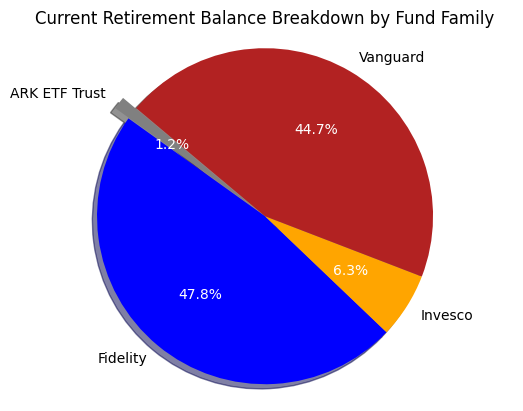

In [3]:
df = stocks_df.groupby(['Fund Family']).agg(Balances=('Total Investment', 'sum')).reset_index()
pie_chart_balance_breakdown(df, by_column='Fund Family')

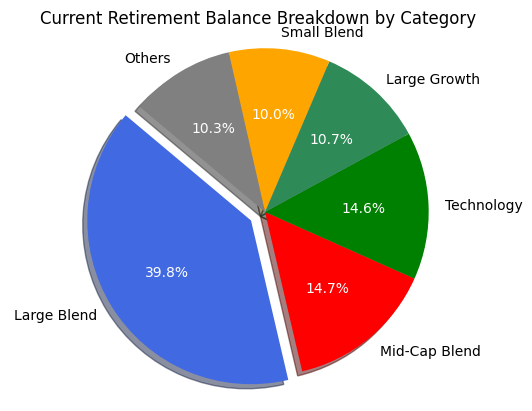

In [4]:
df = stocks_df.groupby(['Category']).agg(Balances=('Total Investment', 'sum')).reset_index()
pie_chart_balance_breakdown(df, by_column='Category', max_slices = 6)

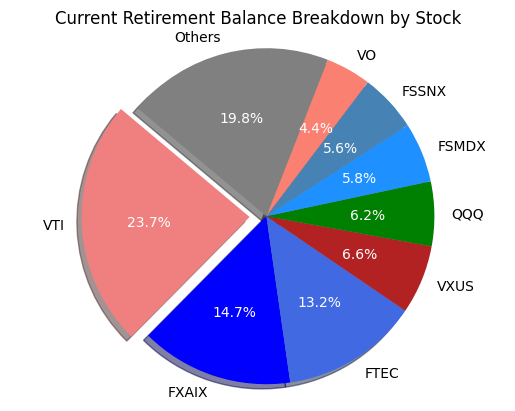

In [5]:
df = stocks_df.groupby(['Stock']).agg(Balances=('Total Investment', 'sum')).reset_index()
pie_chart_balance_breakdown(df, by_column='Stock', max_slices = 9)